In [0]:
from random import randint
from numpy import array
from numpy import argmax
from pandas import concat
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.utils import np_utils
import collections
import seaborn as sns

# [演繹法]コンピュータ上でサイコロを作る

- 1から6の値をランダムに出力する

In [0]:
# サイコロのように振る舞う乱数を100個生成する
roll_dices = [randint(0,5) + 1 for _ in range(100)]

print("100回施行した結果")
print(roll_dices)

print("各目が出た結果")
count_result = collections.Counter(roll_dices)
for k, v in sorted(count_result.items()):
    print(str(k) + ": " + str(v) + "(" + str(v)  + " %)")
    
sns.distplot(roll_dices, kde=False, rug=False, bins=20)

NameError: ignored

# [帰納法]コンピュータ上でサイコロを作る

- 100回サイコロを試行して最も出やすい目を選択する

100回試行した結果
[4, 1, 1, 5, 4, 6, 4, 3, 4, 1, 1, 4, 3, 5, 3, 6, 6, 3, 4, 1, 1, 4, 1, 6, 4, 5, 4, 5, 1, 1, 5, 4, 4, 6, 5, 4, 5, 6, 5, 4, 5, 3, 2, 4, 6, 3, 3, 4, 1, 1, 1, 5, 2, 3, 5, 5, 3, 4, 6, 6, 3, 4, 3, 3, 5, 5, 3, 1, 1, 1, 4, 5, 6, 3, 3, 5, 6, 2, 1, 4, 2, 3, 4, 2, 3, 2, 6, 4, 5, 2, 2, 4, 2, 1, 1, 4, 3, 2, 3, 2]
各目が出た結果
1: 18(18 %)
2: 11(11 %)
3: 19(19 %)
4: 23(23 %)
5: 17(17 %)
6: 12(12 %)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


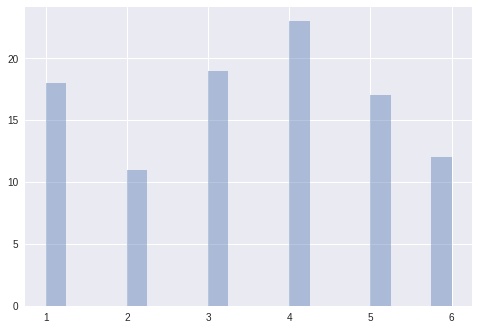

In [0]:
def induction_dice():
  # 100回施行した結果から最も出やすい出現数を選ぶ
  roll_dices = [randint(0,5) + 1 for _ in range(100)]
  count_result = collections.Counter(roll_dices)
  max_key, _ = max(count_result.items(), key=lambda x: x[1])
  return max_key
  
roll_dices = [induction_dice() for _ in range(100)]

print("100回試行した結果")
print(roll_dices)

print("各目が出た結果")
count_result = collections.Counter(roll_dices)
for k, v in sorted(count_result.items()):
    print(str(k) + ": " + str(v) + "(" + str(v)  + " %)")
    
sns.distplot(roll_dices, kde=False, rug=False, bins=20)

# [帰納法]コンピュータ上で深層学習を利用してサイコロを作る

- ランダムな数字のデータを大量に作る(generate_data関数)
- modelブロックでニューラルネットワークを定義
- 学習を回す
- 学んだ内容を推論する

In [0]:
def generate_sequence(length=100):
    return [randint(0, 5) for _ in range(length)]

def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

def generate_data():
    sequence = generate_sequence()
    encoded = np_utils.to_categorical(sequence, num_classes=6)
    df = DataFrame(encoded)
    df = concat([df.shift(4), df.shift(3), df.shift(2), df.shift(1), df], axis=1)
    values = df.values
    values = values[5:,:]
    X = values.reshape(len(values), 5, 6)
    y = encoded[4:-1,:]
    return X, y

In [0]:
model = Sequential()
model.add(LSTM(50, batch_input_shape=(5, 5, 6), stateful=True))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (5, 50)                   11400     
_________________________________________________________________
dense_1 (Dense)              (5, 6)                    306       
Total params: 11,706
Trainable params: 11,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fit model
for i in range(300):
    X, y = generate_data()
    model.fit(X, y, epochs=1, batch_size=5, verbose=2, shuffle=False)
    model.reset_states()

Epoch 1/1
 - 3s - loss: 1.8086 - acc: 0.1368
Epoch 1/1
 - 0s - loss: 1.7722 - acc: 0.1895
Epoch 1/1
 - 0s - loss: 1.7757 - acc: 0.2000
Epoch 1/1
 - 0s - loss: 1.7470 - acc: 0.2526
Epoch 1/1
 - 0s - loss: 1.7251 - acc: 0.3263
Epoch 1/1
 - 0s - loss: 1.6971 - acc: 0.3684
Epoch 1/1
 - 0s - loss: 1.6623 - acc: 0.3684
Epoch 1/1
 - 0s - loss: 1.6765 - acc: 0.3895
Epoch 1/1
 - 0s - loss: 1.6208 - acc: 0.3684
Epoch 1/1
 - 0s - loss: 1.6152 - acc: 0.3579
Epoch 1/1
 - 0s - loss: 1.5741 - acc: 0.4421
Epoch 1/1
 - 0s - loss: 1.5326 - acc: 0.4000
Epoch 1/1
 - 0s - loss: 1.6046 - acc: 0.4105
Epoch 1/1
 - 0s - loss: 1.3492 - acc: 0.4632
Epoch 1/1
 - 0s - loss: 1.3789 - acc: 0.5158
Epoch 1/1
 - 0s - loss: 1.3684 - acc: 0.5158
Epoch 1/1
 - 0s - loss: 1.2898 - acc: 0.5158
Epoch 1/1
 - 0s - loss: 1.1043 - acc: 0.6211
Epoch 1/1
 - 0s - loss: 0.9276 - acc: 0.7053
Epoch 1/1
 - 0s - loss: 0.9997 - acc: 0.7263
Epoch 1/1
 - 0s - loss: 0.9030 - acc: 0.7474
Epoch 1/1
 - 0s - loss: 0.8523 - acc: 0.7579
Epoch 1/1


100回試行した結果
[3, 4, 2, 6, 2, 1, 2, 2, 3, 4, 5, 3, 1, 6, 2, 4, 4, 4, 5, 3, 1, 6, 4, 2, 4, 3, 6, 6, 3, 5, 4, 3, 6, 4, 5, 6, 1, 3, 2, 6, 1, 2, 2, 3, 2, 3, 3, 4, 2, 1, 2, 2, 6, 6, 1, 5, 6, 1, 5, 2, 6, 4, 1, 2, 5, 5, 5, 1, 5, 6, 4, 5, 6, 5, 3, 3, 4, 4, 6, 2, 2, 3, 6, 6, 4, 2, 5, 3, 3, 3, 2, 3, 6, 1, 3]
各目が出た結果
1: 11(11 %)
2: 19(19 %)
3: 19(19 %)
4: 15(15 %)
5: 13(13 %)
6: 18(18 %)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


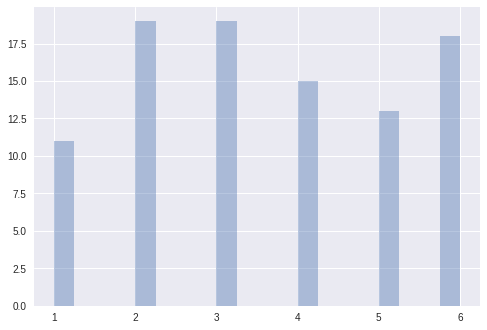

In [0]:
X, y = generate_data()
predicts = model.predict(X, batch_size=5)
roll_dices = [predict + 1 for predict in one_hot_decode(predicts)]

print("100回試行した結果")
print(roll_dices)

print("各目が出た結果")
count_result = collections.Counter(roll_dices)
for k, v in sorted(count_result.items()):
    print(str(k) + ": " + str(v) + "(" + str(v)  + " %)")
    
sns.distplot(roll_dices, kde=False, rug=False, bins=20)